## Exercise 1

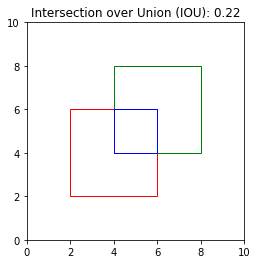

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def calculate_iou(box1, box2):
    # Get the coordinates of the intersection rectangle
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    
    # Calculate the area of intersection rectangle
    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    
    # Calculate the area of both bounding boxes
    box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    
    # Calculate the Union area
    union_area = box1_area + box2_area - intersection_area
    
    # Calculate IOU
    iou = intersection_area / union_area
    return iou, (x1, y1, x2, y2)

# Bounding Box 1 (Predicted)
box1 = (2, 2, 6, 6)

# Bounding Box 2 (Ground Truth)
box2 = (4, 4, 8, 8)

iou, intersection_coords = calculate_iou(box1, box2)

# Plot the bounding boxes and intersection
fig, ax = plt.subplots()
ax.add_patch(patches.Rectangle((box1[0], box1[1]), box1[2]-box1[0], box1[3]-box1[1], fill=False, edgecolor='r'))
ax.add_patch(patches.Rectangle((box2[0], box2[1]), box2[2]-box2[0], box2[3]-box2[1], fill=False, edgecolor='g'))
ax.add_patch(patches.Rectangle((intersection_coords[0], intersection_coords[1]), intersection_coords[2]-intersection_coords[0], intersection_coords[3]-intersection_coords[1], fill=False, edgecolor='b'))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_aspect('equal', adjustable='box')
plt.title(f'Intersection over Union (IOU): {iou:.2f}')
plt.show()

## Exercise 2

## Mapping State

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def calculate_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    union_area = box1_area + box2_area - intersection_area

    iou = intersection_area / union_area
    return iou

def evaluate_predictions(predictions, ground_truths, iou_threshold):
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    for pred_box, gt_box in zip(predictions, ground_truths):
        iou = calculate_iou(pred_box, gt_box)
        
        if iou >= iou_threshold:
            true_positives += 1
        else:
            false_positives += 1
            false_negatives += 1

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    return true_positives, false_positives, false_negatives, precision, recall


In [3]:
def plot_boxes_with_intersection(predictions, ground_truths, iou_threshold):
    fig, ax = plt.subplots()

    for pred_box, gt_box in zip(predictions, ground_truths):
        iou = calculate_iou(pred_box, gt_box)
        color = 'r' if iou < iou_threshold else 'g'

        # Plot prediction box
        ax.add_patch(patches.Rectangle((pred_box[0], pred_box[1]), pred_box[2]-pred_box[0], pred_box[3]-pred_box[1], fill=False, edgecolor='b'))

        # Plot ground truth box
        ax.add_patch(patches.Rectangle((gt_box[0], gt_box[1]), gt_box[2]-gt_box[0], gt_box[3]-gt_box[1], fill=False, edgecolor='y'))

        # Plot intersection box
        if iou >= iou_threshold:
            x1 = max(pred_box[0], gt_box[0])
            y1 = max(pred_box[1], gt_box[1])
            x2 = min(pred_box[2], gt_box[2])
            y2 = min(pred_box[3], gt_box[3])
            ax.add_patch(patches.Rectangle((x1, y1), x2-x1, y2-y1, fill=True, facecolor='g', alpha=0.3))

    ax.set_xlim(0, 12)
    ax.set_ylim(0, 12)
    ax.set_aspect('equal', adjustable='box')
    plt.title(f'Bounding Boxes and Intersection (IOU Threshold: {iou_threshold})')
    plt.show()


In [4]:
# Define the predictions and ground truths
predictions = [
    (1, 1, 4, 4),
    (2, 2, 5, 5),
    (7, 7, 9, 9)
]

ground_truths = [
    (1, 1, 3, 3),
    (2, 2, 6, 6),
    (8, 8, 10, 10)
]

iou_threshold = 0.5

# Evaluate the predictions for each corresponding ground truth
tp1, fp1, fn1, precision1, recall1 = evaluate_predictions([predictions[0]], [ground_truths[0]], iou_threshold)
tp2, fp2, fn2, precision2, recall2 = evaluate_predictions([predictions[1]], [ground_truths[1]], iou_threshold)
tp3, fp3, fn3, precision3, recall3 = evaluate_predictions([predictions[2]], [ground_truths[2]], iou_threshold)

print("Prediction 1:")
print(f"True Positives: {tp1}")
print(f"False Positives: {fp1}")
print(f"False Negatives: {fn1}")
print(f"Precision: {precision1}")
print(f"Recall: {recall1}")

print("\nPrediction 2:")
print(f"True Positives: {tp2}")
print(f"False Positives: {fp2}")
print(f"False Negatives: {fn2}")
print(f"Precision: {precision2}")
print(f"Recall: {recall2}")

print("\nPrediction 3:")
print(f"True Positives: {tp3}")
print(f"False Positives: {fp3}")
print(f"False Negatives: {fn3}")
print(f"Precision: {precision3}")
print(f"Recall: {recall3}")

Prediction 1:
True Positives: 1
False Positives: 0
False Negatives: 0
Precision: 1.0
Recall: 1.0

Prediction 2:
True Positives: 1
False Positives: 0
False Negatives: 0
Precision: 1.0
Recall: 1.0

Prediction 3:
True Positives: 0
False Positives: 1
False Negatives: 1
Precision: 0.0
Recall: 0.0


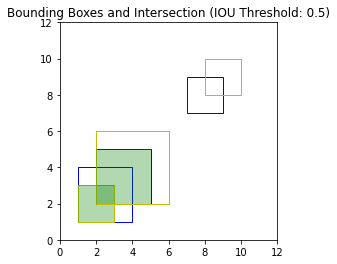

In [5]:
# Plot the boxes and intersections
plot_boxes_with_intersection(predictions, ground_truths, iou_threshold)

## Brute Force State

In [14]:
def calculate_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    union_area = box1_area + box2_area - intersection_area

    iou = intersection_area / union_area
    return iou

def calculate_tp_fp_fn_precision_recall(predictions, ground_truths, iou_threshold=0.5):
    for i, prediction in enumerate(predictions):
        for j, ground_truth in enumerate(ground_truths):
            tp = 0
            fp = 0
            fn = 0
            iou = calculate_iou(prediction, ground_truth)

            if iou >= iou_threshold:
                tp += 1
            else:
                fp += 1
                fn += 1

            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0

            print(f"Prediction {i+1} vs Ground Truth {j+1} - TP: {tp}, FP: {fp}, FN: {fn}, Precision: {precision}, Recall: {recall}")

# Define the predictions and ground truths
predictions = [
    (1, 1, 4, 4),
    (2, 2, 5, 5),
    (7, 7, 9, 9)
]

ground_truths = [
    (1, 1, 3, 3),
    (2, 2, 6, 6),
    (8, 8, 10, 10)
]

iou_threshold = 0.5

# calculate TP, FP, FN, Precision and Recall
calculate_tp_fp_fn_precision_recall(predictions, ground_truths)

Prediction 1 vs Ground Truth 1 - TP: 1, FP: 0, FN: 0, Precision: 1.0, Recall: 1.0
Prediction 1 vs Ground Truth 2 - TP: 0, FP: 1, FN: 1, Precision: 0.0, Recall: 0.0
Prediction 1 vs Ground Truth 3 - TP: 0, FP: 1, FN: 1, Precision: 0.0, Recall: 0.0
Prediction 2 vs Ground Truth 1 - TP: 0, FP: 1, FN: 1, Precision: 0.0, Recall: 0.0
Prediction 2 vs Ground Truth 2 - TP: 1, FP: 0, FN: 0, Precision: 1.0, Recall: 1.0
Prediction 2 vs Ground Truth 3 - TP: 0, FP: 1, FN: 1, Precision: 0.0, Recall: 0.0
Prediction 3 vs Ground Truth 1 - TP: 0, FP: 1, FN: 1, Precision: 0.0, Recall: 0.0
Prediction 3 vs Ground Truth 2 - TP: 0, FP: 1, FN: 1, Precision: 0.0, Recall: 0.0
Prediction 3 vs Ground Truth 3 - TP: 0, FP: 1, FN: 1, Precision: 0.0, Recall: 0.0


### Description for exercise 2
When a prediction overlaps significantly with a ground truth (based on the Intersection over Union (IOU) threshold), it is considered a **True Positive**. This indicates that the prediction correctly identifies and aligns with a ground truth object. and If a prediction does not have a significant overlap with any ground truth or if it overlaps with the wrong ground truth, it is categorized as a **False Positive**. This means the prediction incorrectly identifies an object that is not present in the ground truth. and When a ground truth object is not detected or matched by any prediction, it results in a **False Negative**. This indicates that the model failed to detect an object that should have been present.

**Precision** is calculated as the ratio of True Positives to the sum of True Positives and False Positives. It measures the accuracy of the positive predictions.
*Precision = TP / (TP + FP)*

**Recall** is calculated as the ratio of True Positives to the sum of True Positives and False Negatives. It measures the ability of the model to correctly identify all relevant instances.
*Recall = TP / (TP + FN)*

So by looking at the TP, FP, and FN values for each prediction against every ground truth, we can determine which ground truth each prediction belongs to based on the highest matching IoU and the associated True Positive count. A higher TP value for a specific ground truth indicates that the prediction is most likely corresponding to that particular ground truth object. False Positive and False Negative counts help in identifying incorrect matches and missed detections, respectively, aiding in refining the association between predictions and ground truths.

and here are right predictions and ground truth
<br>*Prediction 1 vs Ground Truth 1*
<br>*Prediction 2 vs Ground Truth 2*

## Exercise 3

In [15]:
def calculate_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection = max(0, x2 - x1) * max(0, y2 - y1)
    area_box1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area_box2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union = area_box1 + area_box2 - intersection

    return intersection / union

def calculate_precision_recall(predictions, ground_truths, iou_threshold):
    tp = 0
    fp = 0
    fn = len(ground_truths)

    for prediction in predictions:
        iou_scores = [calculate_iou(prediction['bbox'], gt) for gt in ground_truths]
        max_iou = max(iou_scores) if iou_scores else 0

        if max_iou >= iou_threshold:
            tp += 1
            fn -= 1
        else:
            fp += 1

    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0

    return precision, recall

def calculate_ap(predictions, ground_truths, iou_threshold):
    precisions = []
    recalls = []

    for prediction in predictions:
        precision, recall = calculate_precision_recall([prediction], ground_truths, iou_threshold)
        precisions.append(precision)
        recalls.append(recall)

    sorted_indices = sorted(range(len(precisions)), key=lambda x: predictions[x]['confidence'], reverse=True)
    precisions = [precisions[i] for i in sorted_indices]
    recalls = [recalls[i] for i in sorted_indices]

    ap = 0
    for i in range(len(precisions)):
        ap += precisions[i] * (recalls[i] - recalls[i-1]) if i > 0 else precisions[i] * recalls[i]

    return ap

def calculate_map(predictions, ground_truths, iou_threshold):
    ap_sum = 0
    class_count = len(predictions)

    for i in range(class_count):
        ap = calculate_ap(predictions[i], ground_truths[i], iou_threshold)
        ap_sum += ap

    map = ap_sum / class_count
    return map


In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_boxes_with_intersection(predictions, ground_truths, iou_threshold, class_color):
    fig, ax = plt.subplots()

    for pred_box in predictions:
        ax.add_patch(patches.Rectangle((pred_box['bbox'][0], pred_box['bbox'][1]), pred_box['bbox'][2] - pred_box['bbox'][0], pred_box['bbox'][3] - pred_box['bbox'][1], fill=False, edgecolor=class_color))

    for gt_box in ground_truths:
        ax.add_patch(patches.Rectangle((gt_box[0], gt_box[1]), gt_box[2] - gt_box[0], gt_box[3] - gt_box[1], fill=False, edgecolor='y'))

    for pred_box in predictions:
        for gt_box in ground_truths:
            iou = calculate_iou(pred_box['bbox'], gt_box)
            if iou >= iou_threshold:
                x1 = max(pred_box['bbox'][0], gt_box[0])
                y1 = max(pred_box['bbox'][1], gt_box[1])
                x2 = min(pred_box['bbox'][2], gt_box[2])
                y2 = min(pred_box['bbox'][3], gt_box[3])
                ax.add_patch(patches.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=True, facecolor='g', alpha=0.3))

    ax.set_xlim(0, 12)
    ax.set_ylim(0, 12)
    ax.set_aspect('equal', adjustable='box')
    plt.title(f'Bounding Boxes and Intersection (IOU Threshold: {iou_threshold})')
    plt.show()


In [17]:
# Define the predictions and ground truths for each class
class1_predictions = [
    {'confidence': 0.9, 'bbox': (1, 1, 4, 4)},
    {'confidence': 0.8, 'bbox': (2, 2, 5, 5)},
    {'confidence': 0.7, 'bbox': (3, 3, 6, 6)}
]

class1_ground_truths = [
    (1, 1, 3, 3),
    (2, 2, 5, 5)
]

class2_predictions = [
    {'confidence': 0.85, 'bbox': (5, 5, 7, 7)},
    {'confidence': 0.75, 'bbox': (6, 6, 8, 8)}
]

class2_ground_truths = [
    (5, 5, 7, 7)
]

# Define the colors for each class
class1_color = 'b'
class2_color = 'r'

In [18]:
# Calculate mAP for each class and the final mAP
class1_map = calculate_map([class1_predictions, class2_predictions], [class1_ground_truths, class2_ground_truths], iou_threshold=0.5)
print(f"Class 1 mAP: {calculate_map([class1_predictions], [class1_ground_truths], iou_threshold=0.5)}")
print(f"Class 2 mAP: {calculate_map([class2_predictions], [class2_ground_truths], iou_threshold=0.5)}")
print(f"Final mAP: {class1_map}")

Class 1 mAP: 0.5
Class 2 mAP: 1.0
Final mAP: 0.75


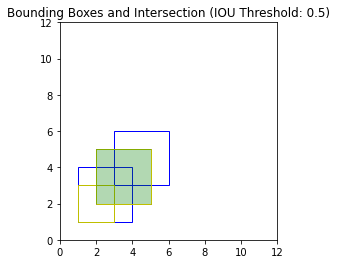

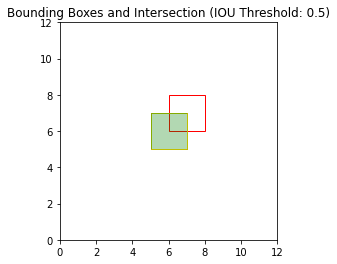

In [19]:
# Plot the boxes and intersection for each class
plot_boxes_with_intersection(class1_predictions, class1_ground_truths, iou_threshold=0.5, class_color=class1_color)
plot_boxes_with_intersection(class2_predictions, class2_ground_truths, iou_threshold=0.5, class_color=class2_color)

# New Solution with confidence threshold from 0.05 to 0.95

In [14]:
def calculate_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection = max(0, x2 - x1) * max(0, y2 - y1)
    area_box1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area_box2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union = area_box1 + area_box2 - intersection

    return intersection / union

In [20]:
def calculate_precision_recall(predictions, ground_truths, iou_threshold, conf_threshold):
    tp = 0
    fp = 0
    fn = 0

    for pred in predictions:
        true_positive = False
        for gt in ground_truths:
            iou = calculate_iou(pred[2:], gt)

            if pred[0] >= conf_threshold and iou >= iou_threshold:
                true_positive = True
                break

        if true_positive:
            tp += 1
        elif pred[0] >= conf_threshold:
            fp += 1
        else:
            fn += 1

    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0

    return precision, recall

def calculate_average_precision(predictions, ground_truths, iou_threshold):
    precisions = []
    recalls = []

    for conf_threshold in [i/20 for i in range(1, 20)]:
        precision, recall = calculate_precision_recall(predictions, ground_truths, iou_threshold, conf_threshold)
        precisions.append(precision)
        recalls.append(recall)

    # Calculate the area under the precision-recall curve using the trapezoidal rule
    ap = 0
    for i in range(1, len(recalls)):
        ap += (recalls[i] - recalls[i-1]) * precisions[i]

    return ap


# Class 1 data
class1_predictions = [
    (0.9, 1, 1, 1, 4, 4),
    (0.8, 2, 2, 2, 5, 5),
    (0.7, 3, 3, 3, 6, 6)
]

class1_ground_truths = [
    (1, 1, 1, 3, 3),
    (2, 2, 2, 5, 5)
]

# Class 2 data
class2_predictions = [
    (0.85, 5, 5, 5, 7, 7),
    (0.75, 6, 6, 6, 8, 8)
]

class2_ground_truths = [
    (5, 5, 5, 7, 7)
]

iou_threshold = 0.5

# Calculate mAP for Class 1
class1_ap = calculate_average_precision(class1_predictions, class1_ground_truths, iou_threshold)

# Calculate mAP for Class 2
class2_ap = calculate_average_precision(class2_predictions, class2_ground_truths, iou_threshold)

# Calculate final mAP
final_map = (class1_ap + class2_ap) / 2

print("Class 1 mAP:", class1_ap)
print("Class 2 mAP:", class2_ap)
print("Final mAP:", final_map)

Class 1 mAP: 0.0
Class 2 mAP: 0.0
Final mAP: 0.0
